In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.special import factorial

In [9]:
def g(intensities):
    res = np.array([])
    for intensity in intensities:
        res = np.append(res, np.sum(failure_prob*np.exp(-intensity*frame_length)*(intensity*frame_length)**user_range / factorial(user_range)))
    return res

In [10]:
number_of_drops = 1e6
results = np.array([0,0,0,0,0,11,46,141,429,1380,4660,14811,44000,117289,269364,510164,768924,939015,993827,999920,1000000,1000000,1000000,1000000,1000000])
max_number_of_users=len(results)

failure_prob = results/number_of_drops
frame_length = 26
error_probs = np.array([])
user_range = np.arange(1,max_number_of_users + 0.1, 1)
lambdas = np.arange(0.025,0.26,0.025)
error_probs = g(lambdas)

In [11]:
xpoints = np.linspace(lambdas[0],lambdas[-1],1000)
curve = g(xpoints)

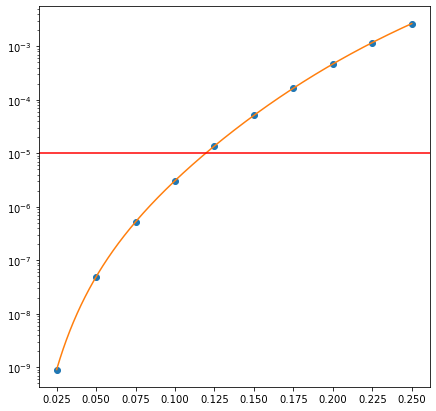

In [12]:
plt.figure(figsize=(7,7))
plt.plot(lambdas, error_probs, 'o')
plt.semilogy(xpoints, curve)
plt.axhline(y = 1e-5, color = 'r', linestyle = '-')
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _